In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.tools as tls
# Standard plotly imports
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [15]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.16.3
0.23.4
3.0.2
0.9.0


In [16]:
plotly.__version__

'3.9.0'

# Import The Data

In [2]:
total_visitors = pd.read_excel('Total_Visitors_v3.xlsx')
total_visitors.shape
total_visitors.dtypes
total_visitors = total_visitors.set_index('Date')
total_visitors.index
total_visitors.rename(columns={'Tram_Counts':'Tram Counts',
                               'Venue_Visitation':'Venue Visitation',
                               'Tram_Conversions':'Tram Conversions',
                               'public_holiday' :'Public Holiday',
                               'cruise_event':'Cruise Event',
                               'regional_event':'Regional Event',
                               'school_holiday': 'School Holiday',
                               'total_opening': 'Total Opening (Hours)'}, 
                      inplace=True)
total_visitors.iloc[:,0:3].describe()

,Tram Counts,Venue Visitation,Tram Conversions
count,1594.000000,863.000000,863.000000
mean,2244.980552,3101.800695,69.412829
std,1384.901409,1840.137434,16.112128
min,0.000000,0.000000,0.000000
25%,1074.500000,1739.000000,62.000000
50%,2093.000000,2777.000000,71.000000
75%,3069.500000,4051.500000,79.000000
max,7687.000000,10996.000000,140.000000


In [3]:
# Select only specific date
#total_visitors.loc['2018-08-10']
total_visitors = total_visitors.loc['2017-01-01':]
#total_visitors.loc['2018-02']
#total_visitors.loc['2018']

In [4]:
total_visitors.head()
#total_visitors.tail()

,Tram Counts,Venue Visitation,Tram Conversions,day,weekend,month,season,Public Holiday,Regional Event,School Holiday,...,AVG_visibility,MAX_visibility,MIN_visibility,STD_visibility,VAR_visibility,RANGE_visibility,Tram_Counts_AVG_7,Tram_Counts_Lag_1,Tram_Counts_Lag_7,employment_in_thousands
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2618,2905.0,90.120482,7,1,1,Winter,1,0,1,...,10.566750,16.089,3.384,4.664476,21.757333,12.705,5396.571429,3871.0,0.0,12129.83918
2017-01-02,2886,3843.0,75.097580,1,0,1,Winter,0,0,0,...,12.147417,16.089,1.966,4.927880,24.284004,14.123,5770.571429,2618.0,6641.0,12129.83918
2017-01-03,2420,2399.0,100.875365,2,0,1,Winter,0,0,0,...,15.821500,16.089,13.400,0.658708,0.433897,2.689,5234.142857,2886.0,6266.0,12129.83918
2017-01-04,1714,1900.0,90.210526,3,0,1,Winter,0,0,0,...,15.937375,16.089,13.916,0.524169,0.274753,2.173,4684.714286,2420.0,6867.0,12129.83918
2017-01-05,1292,1412.0,91.501416,4,0,1,Winter,0,0,0,...,12.231792,16.089,8.046,2.368355,5.609105,8.043,3948.571429,1714.0,7070.0,12129.83918


# Histogram of Tram Counts

In [11]:
layout = go.Layout(title='Distribution of Tram Counts', 
                   xaxis=dict(title='Tram Counts'), yaxis=dict(title='Frequency'))
fig = go.Figure(data=[go.Histogram(x=total_visitors['Tram Counts'])], layout=layout)
py.iplot(fig)

# Last 5 Years of Tram Counts

In [14]:
trace1 = go.Scatter(x = total_visitors.index, y = total_visitors['Tram Counts'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Tram Counts')

# set x-axis labels and their corresponding data values
#labels = ['Spring 2018', 'Summer 2018', 'Fall 2018', 'Winter 2018', 'Spring 2019']
#tickvals = ['2018-03-01', '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01']
labels2 = ['2015','2016','2017','2018', '2019']
tickvals2 = ['2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01']

data = [trace1]
layout = go.Layout(title='Tram Counts Visitation 2015 - 2019', xaxis=go.layout.XAxis(ticktext=labels2, tickvals=tickvals2), yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Last 5 Years of Tram Counts Average Last 7 Days

In [80]:
trace1 = go.Scatter(x = total_visitors.index, y = total_visitors['Tram Counts'][7:], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Tram Counts')
trace2 = go.Scatter(x = total_visitors.index, y = total_visitors['Tram_Counts_AVG_7'][7:], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Tram Counts Avg Last 7 Days')

# set x-axis labels and their corresponding data values
labels2 = ['2015','2016','2017','2018', '2019']
tickvals2 = ['2015-01-08','2016-01-01','2017-01-01','2018-01-01','2019-01-01']

data = [trace1, trace2]
layout = go.Layout(title='Tram Counts vs Tram Counts Average Last 7 Days 2015 - 2019', xaxis=go.layout.XAxis(ticktext=labels2, tickvals=tickvals2), yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Venue Visitation vs Tram Counts

In [8]:
trace0 = go.Bar(x=total_visitors.index, y=total_visitors['Venue Visitation'], name='Venue Visitation', 
                marker=dict(color='rgb(200,200,200)', 
                line=dict(color='rgb(8,48,107)', 
                width=0.5),),opacity=0.5)
trace1 = go.Scatter(x = total_visitors.index, y = total_visitors['Tram Counts'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Tram Counts')

# set x-axis labels and their corresponding data values
#labels = ['Spring 2018', 'Summer 2018', 'Fall 2018', 'Winter 2018', 'Spring 2019']
#tickvals = ['2018-03-01', '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01']
labels2 = ['2017','2018', '2019']
tickvals2 = ['2017-01-01','2018-01-01','2019-01-01']

data = [trace0, trace1]
layout = go.Layout(title='Venue Visitation vs Tram Counts', xaxis=go.layout.XAxis(ticktext=labels2, tickvals=tickvals2), 
                   yaxis=dict(title='Number of Visitation'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Venue Visitation vs Tram Conversions

In [5]:
trace2 = go.Bar(x=total_visitors.index, y=total_visitors['Venue Visitation'], name='Venue Visitation')
trace3 = go.Scatter(x = total_visitors.index, y = total_visitors['Tram Conversions'], name='Tram Conversions', yaxis='y2')
#labels = ['Spring 2018', 'Summer 2018', 'Fall 2018', 'Winter 2018', 'Spring 2019']
#tickvals = ['2018-03-01', '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01']
labels2 = ['2017','2018', '2019']
tickvals2 = ['2017-01-01','2018-01-01','2019-01-01']
data1 = [trace2, trace3]
layout = go.Layout(title='Venue Visitation vs Tram Conversions', yaxis=dict(title='Number of Visitation', 
                                                                           range=[0, 8000]), 
                   yaxis2=dict(title='Conversions Rate (%)', titlefont=dict(color='rgb(148, 103, 189)'), 
                               tickfont=dict(color='rgb(148, 103, 189)'), overlaying='y', side='right', 
                               range=[0, 500]), 
                   xaxis=go.layout.XAxis(ticktext=labels2, tickvals=tickvals2))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

# Correlation Plot

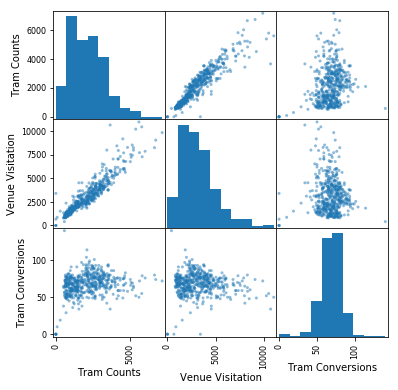

In [27]:
pd.scatter_matrix(total_visitors.iloc[:,0:3], figsize=(6, 6))
plt.show()

# Total Opening Correlation

In [9]:
total_opening = pd.read_excel('Total_Opening.xlsx')
total_opening.index
total_opening

,Total Opening
Space Center Visitation,0.568451
Tram Counts,0.623787


In [3]:
trace0 = go.Scatter(x = total_opening.index, y = total_opening['Total Opening'], 
                    mode = 'markers', marker_size=[40, 60])

data = [trace0]

layout = go.Layout(title='Total Venue Opening (Hours) vs Visitations', yaxis=dict(title='Correlation Value', range=[0.4, 0.7]), width=700, height=500)                  

fig = go.Figure(data=data, layout=layout)


py.iplot(fig)

NameError: name 'total_opening' is not defined

# Tram Counts by Day/Weekend/Month/Season

In [11]:
trace0 = go.Box(y=total_visitors['Tram Counts'], 
                x=total_visitors['day'], marker=dict(color='#3D9970'), boxmean=True)
data = [trace0]
layout = go.Layout(title = "Tram Counts by Day", yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Day")

#sns.boxplot(data=total_visitors, x='day', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='day', y='Tram_Counts')

In [55]:
trace0 = go.Box(
    y = list(total_visitors.loc[total_visitors['weekend'] == 0, 'Tram Counts']),
    name = "Weekday",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#3D9970'), boxmean=True
)

trace1 = go.Box(
    y = list(total_visitors.loc[total_visitors['weekend'] == 1, 'Tram Counts']),
    name = "Weekend",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#FF851B'), boxmean=True
)

data = [trace0, trace1]
layout = go.Layout(title = "Tram Counts by Weekend", yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Weekend")

#sns.boxplot(data=total_visitors, x='weekend', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='weekend', y='Tram_Counts')

In [13]:
trace0 = go.Box(y=total_visitors['Tram Counts'], 
                x=total_visitors['month'], boxpoints = 'outliers', marker=dict(color='#FF4136', 
                outliercolor = 'rgba(219, 64, 82, 0.6)', line = dict(outliercolor = 'rgba(219, 64, 82, 0.6)', 
                outlierwidth = 2)), line = dict(color = 'rgb(8,81,156)'), boxmean=True)
data = [trace0]
layout = go.Layout(title = "Tram Counts by Month", yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Month")

#sns.boxplot(data=total_visitors, x='month', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='month', y='Tram_Counts')

In [14]:
trace0 = go.Box(y=total_visitors['Tram Counts'], 
                x=total_visitors['season'], boxpoints = 'outliers', marker=dict(color='#FF4136', 
                outliercolor = 'rgba(219, 64, 82, 0.6)', line = dict(outliercolor = 'rgba(219, 64, 82, 0.6)', 
                outlierwidth = 2)), line = dict(color = 'rgb(8,81,156)'), boxmean=True)
data = [trace0]
layout = go.Layout(title = "Tram Counts by Season", yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Season")

#sns.boxplot(data=total_visitors, x='season', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='season', y='Tram_Counts')

# Tram Counts by School Holiday, Public Holiday, Regional Event, Cruise Events

In [3]:
trace0 = go.Box(
    y = list(total_visitors.loc[total_visitors['School Holiday'] == 0, 'Tram Counts']),
    name = "Not School Holiday",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#3D9970'), boxmean=True
)

trace1 = go.Box(
    y = list(total_visitors.loc[total_visitors['School Holiday'] == 1, 'Tram Counts']),
    name = "School Holiday",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#FF851B'), boxmean=True
)

data = [trace0, trace1]
layout = go.Layout(title = "Tram Counts by School Holiday", yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by School Holiday")

#sns.boxplot(data=total_visitors, x='weekend', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='weekend', y='Tram_Counts')

In [4]:
trace0 = go.Box(
    y = list(total_visitors.loc[total_visitors['Public Holiday'] == 0, 'Tram Counts']),
    name = "Not Public Holiday",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#3D9970'), boxmean=True
)

trace1 = go.Box(
    y = list(total_visitors.loc[total_visitors['Public Holiday'] == 1, 'Tram Counts']),
    name = "Public Holiday",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#FF851B'), boxmean=True
)

data = [trace0, trace1]
layout = go.Layout(title = "Tram Counts by Public Holiday")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Public Holiday")

#sns.boxplot(data=total_visitors, x='weekend', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='weekend', y='Tram_Counts')

In [27]:
trace0 = go.Box(
    y = list(total_visitors.loc[total_visitors['Regional Event'] == 0, 'Tram Counts']),
    name = "No",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#3D9970'), boxmean=True
)

trace1 = go.Box(
    y = list(total_visitors.loc[total_visitors['Regional Event'] == 1, 'Tram Counts']),
    name = "Yes",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#FF851B'), boxmean=True
)

data = [trace0, trace1]
layout = go.Layout(title = "Tram Counts by Regional Event", yaxis=dict(title='Frequency'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Regional Event")

#sns.boxplot(data=total_visitors, x='weekend', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='weekend', y='Tram_Counts')

In [10]:
trace0 = go.Box(
    y = list(total_visitors.loc[total_visitors['Cruise Event'] == 0, 'Tram Counts']),
    name = "No",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#3D9970'), boxmean=True
)

trace1 = go.Box(
    y = list(total_visitors.loc[total_visitors['Cruise Event'] == 1, 'Tram Counts']),
    name = "Yes",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#FF851B'), boxmean=True
)

data = [trace0, trace1]
layout = go.Layout(title = "Tram Counts by Cruise Event", yaxis=dict(title='Frequency'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Cruise Event")

#sns.boxplot(data=total_visitors, x='weekend', y='Tram_Counts')
#sns.violinplot(data=total_visitors, x='weekend', y='Tram_Counts')

KeyError: 'Cruise_Event'

# Tram Counts by School Holiday & Day/Week/Month/Season

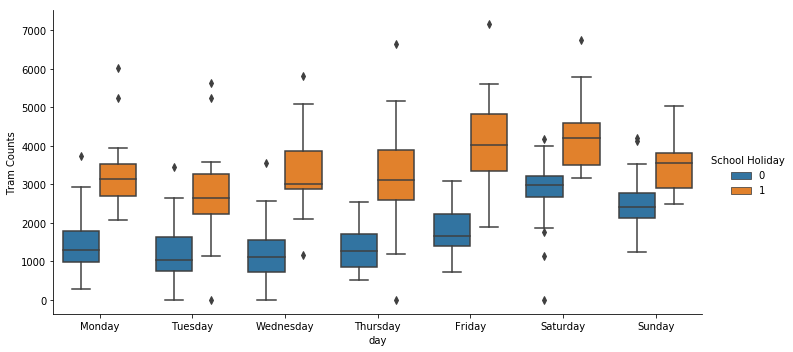

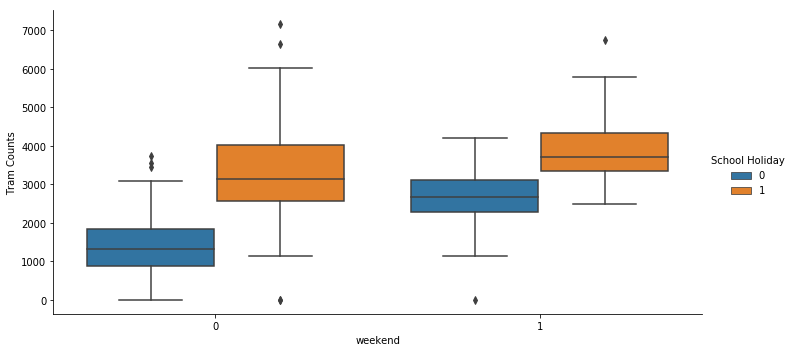

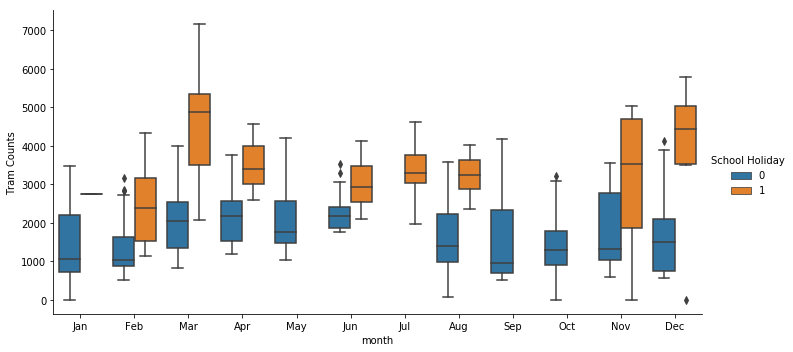

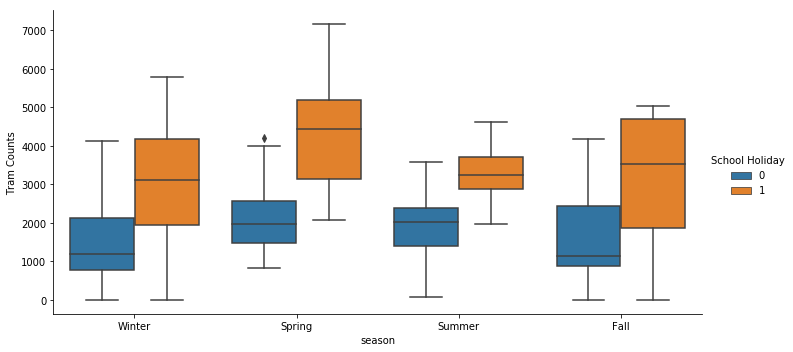

In [29]:
#Tram Counts by School Holiday and Daily/Weekend/Season 
sns.factorplot("day", "Tram Counts", "School Holiday", data=total_visitors, kind="box", size=5, aspect=2)
sns.factorplot("weekend", "Tram Counts", "School Holiday", data=total_visitors, kind="box", size=5, aspect=2)
sns.factorplot("month", "Tram Counts", "School Holiday", data=total_visitors, kind="box", size=5, aspect=2)
sns.factorplot("season", "Tram Counts", "School Holiday", data=total_visitors, kind="box", size=5, aspect=2)

# Tram Counts by Public Holiday & Day/Week/Month/Season

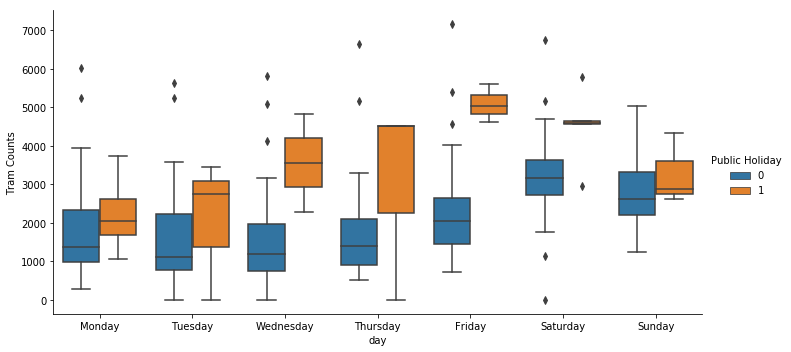

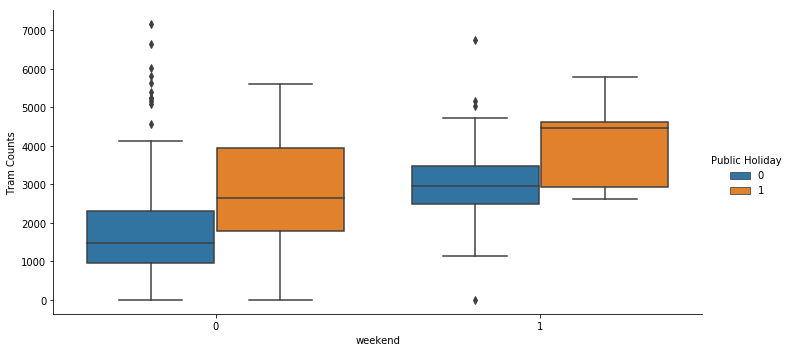

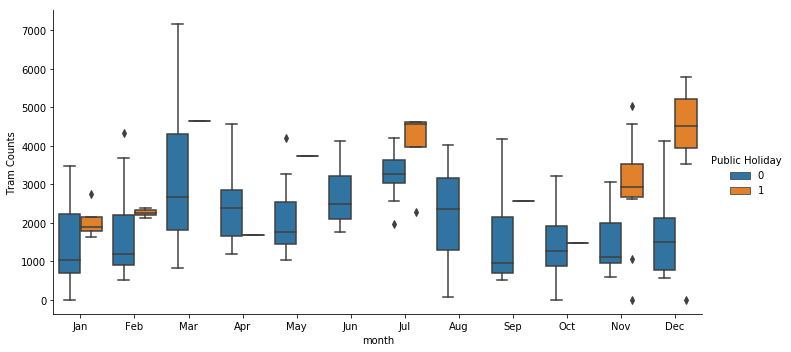

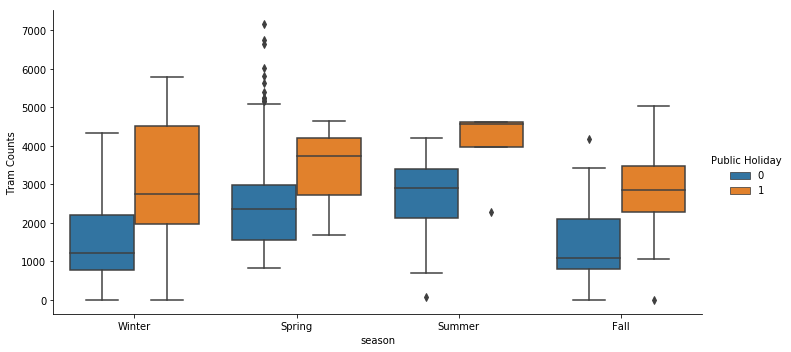

In [30]:
#Tram Counts by Daily/Weekend/Season and School Holiday
sns.factorplot("day", "Tram Counts", "Public Holiday", data=total_visitors, kind="box", size=5, aspect=2)
sns.factorplot("weekend", "Tram Counts", "Public Holiday", data=total_visitors, kind="box", size=5, aspect=2)
sns.factorplot("month", "Tram Counts", "Public Holiday", data=total_visitors, kind="box", size=5, aspect=2)
sns.factorplot("season", "Tram Counts", "Public Holiday", data=total_visitors, kind="box", size=5, aspect=2)

# Tram Counts by Total Opening

In [12]:
list(total_visitors)

['Tram Counts',
 'Venue Visitation',
 'Tram Conversions',
 'day',
 'weekend',
 'month',
 'season',
 'Public Holiday',
 'Regional Event',
 'School Holiday',
 'venue_closed',
 'opening_hours',
 'closing_hours',
 'Total Opening (Hours)',
 'Consignment',
 'Education',
 'Free Admission',
 'General Admission',
 'Group Sales',
 'Groups',
 'Membership',
 'Passes',
 'consignment_perc',
 'education_perc',
 'free_admission_perc',
 'general_admission_perc',
 'group_sales_perc',
 'groups_perc',
 'membership_perc',
 'passes_perc',
 'child',
 'family',
 'ed_sponsor',
 'school_visit',
 'space_traders',
 'ad_gen_admit',
 'ad_gen_admit_int',
 'group_prepay',
 'group_poa',
 'joint_membership',
 'campin',
 'event_admits',
 'space_center_houston_ww',
 'SUM_precipIntensity',
 'AVG_precipIntensity',
 'MAX_precipIntensity',
 'MIN_precipIntensity',
 'STD_precipIntensity',
 'VAR_precipIntensity',
 'RANGE_precipIntensity',
 'SUM_precipProbability',
 'AVG_precipProbability',
 'MAX_precipProbability',
 'MIN_precip

In [5]:
trace0 = go.Box(
    y = list(total_visitors.loc[total_visitors['Total Opening (Hours)'] == 7, 'Tram Counts']),
    name = "7 Hours",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#3D9970'), boxmean=True
)

trace1 = go.Box(
    y = list(total_visitors.loc[total_visitors['Total Opening (Hours)'] == 8, 'Tram Counts']),
    name = "8 Hours",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#FF851B'), boxmean=True
)

trace2 = go.Box(
    y = list(total_visitors.loc[total_visitors['Total Opening (Hours)'] == 9, 'Tram Counts']),
    name = "9 Hours",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(107,174,214)'),
    line = dict(
        color = '#FF851B'), boxmean=True
)

data = [trace0, trace1, trace2]
layout = go.Layout(title = "Tram Counts by Total Opening (Hours)", yaxis=dict(title='Number of Visitors'))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Tram Counts by Total Opening (Hours)")

In [34]:
total_visitors_exc_weekend = total_visitors.loc[total_visitors['weekend'] == 0,:]
total_visitors_exc_weekend.head()

,Tram Counts,Venue Visitation,Tram Conversions,day,weekend,month,season,Public Holiday,Cruise Event,Regional Event,...,Tram_Counts_Lag_7_3,Tram_Counts_Lag_7_4,child_lag_7,child_lag_7_2,child_lag_7_3,child_lag_7_4,Tram_Counts_AVG_4,Tram_Counts_AVG_7,child_AVG_4,child_AVG_7
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1970,2661,74.0,Monday,0,Jan,Winter,1,0,0,...,1037.333333,1039.25,1072.0,620.5,426.000000,298.25,6255.00,5326.142857,987.00,917.750
2018-01-02,2224,3171,70.0,Tuesday,0,Jan,Winter,0,0,0,...,2962.333333,2386.75,981.0,567.0,391.000000,298.25,4865.50,5607.571429,779.50,836.250
2018-01-03,2136,2739,77.0,Wednesday,0,Jan,Winter,0,1,0,...,2959.666667,2354.75,972.0,574.5,390.000000,475.50,3584.50,5065.714286,578.25,765.500
2018-01-04,2214,2434,90.0,Thursday,0,Jan,Winter,0,1,0,...,3850.000000,3187.00,1199.0,722.0,563.666667,435.00,2553.75,4478.571429,449.00,684.875
2018-01-05,2118,2661,79.0,Friday,0,Jan,Winter,0,1,0,...,4185.333333,3648.25,1225.0,797.5,558.666667,487.50,2136.00,3719.428571,382.75,579.875


[Text(0, 0.5, 'Number of Visitation'),
 Text(0.5, 0, 'Total Venue Opening (Hours)')]

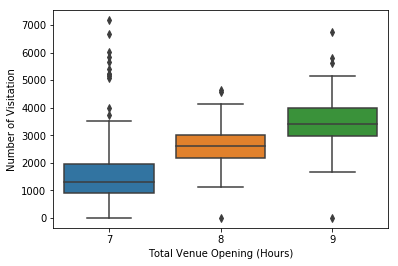

In [35]:
# Tram Counts by Total Opening (Include Weekend)
sns.boxplot(data=total_visitors, x='Total Opening (Hours)', y='Tram Counts').set(xlabel='Total Venue Opening (Hours)', ylabel='Number of Visitation')

[Text(0, 0.5, 'Tram Counts'), Text(0.5, 0, 'total venue opening (hours)')]

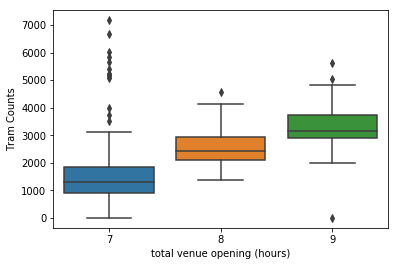

In [38]:
# Tram Counts by Total Opening (Exclude Weekend)
sns.boxplot(data=total_visitors_exc_weekend, x='Total Opening (Hours)', y='Tram Counts').set(xlabel='total venue opening (hours)', ylabel='Tram Counts')

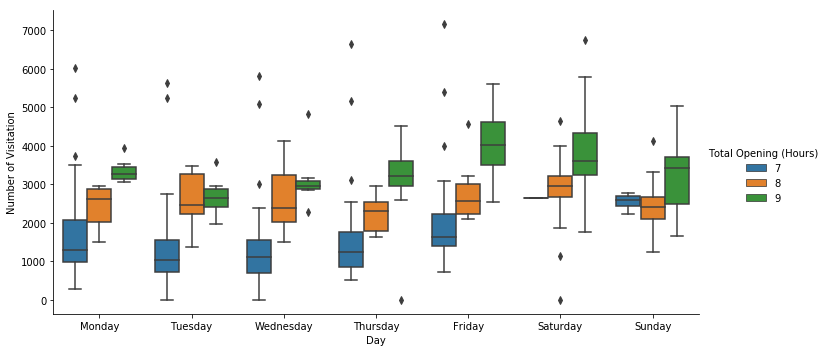

In [39]:
# Tram Counts by Total Opening and Day (Include & Exclude Weekend)
sns.factorplot("day", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='Day', ylabel='Number of Visitation')

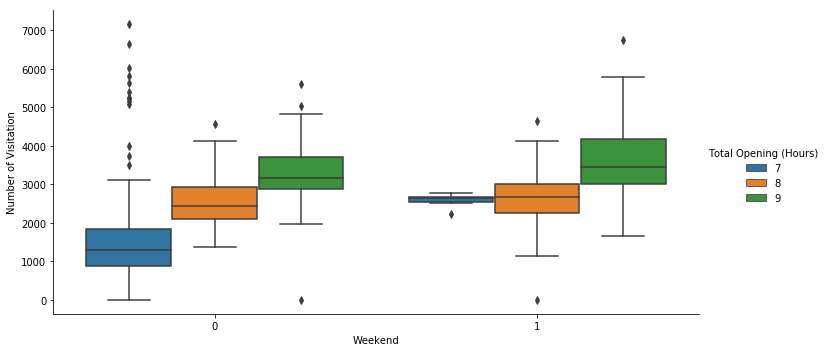

In [40]:
# Tram Counts by Total Opening and Weekend (Include & Exclude Weekend)
sns.factorplot("weekend", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='Weekend', ylabel='Number of Visitation')

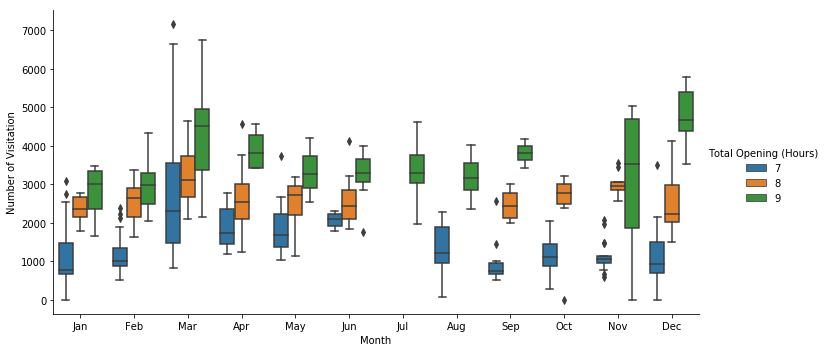

In [41]:
# Tram Counts by Total Opening and Month (Include & Exclude Weekend)
sns.factorplot("month", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='Month', ylabel='Number of Visitation')
#sns.factorplot("month", "Tram_Counts", "total_opening", data=total_visitors_exc_weekend, kind="box", size=5, aspect=2).set(xlabel='Season', ylabel='Tram Counts')

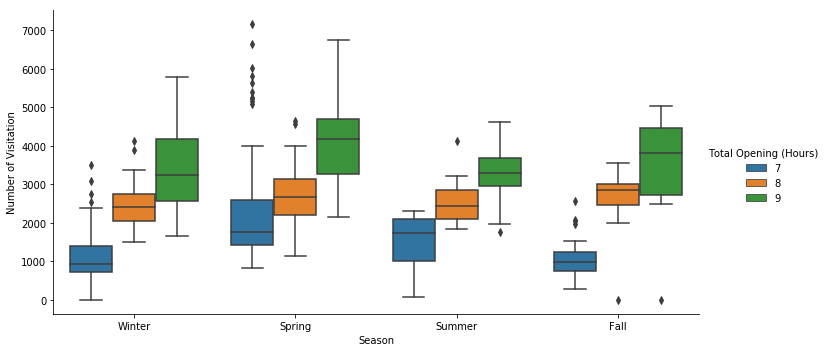

In [42]:
# Tram Counts by Total Opening and Season (Include & Exclude Weekend)
sns.factorplot("season", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='Season', ylabel='Number of Visitation')
#sns.factorplot("season", "Tram_Counts", "total_opening", data=total_visitors_exc_weekend, kind="box", size=5, aspect=2).set(xlabel='total venue opening (hours)', ylabel='Tram Counts')

# Tram Counts by the Venue Opening Time

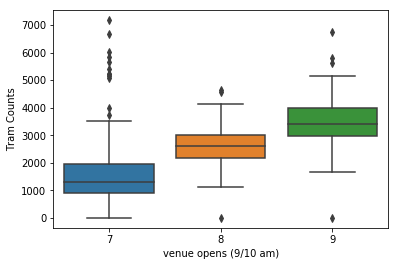

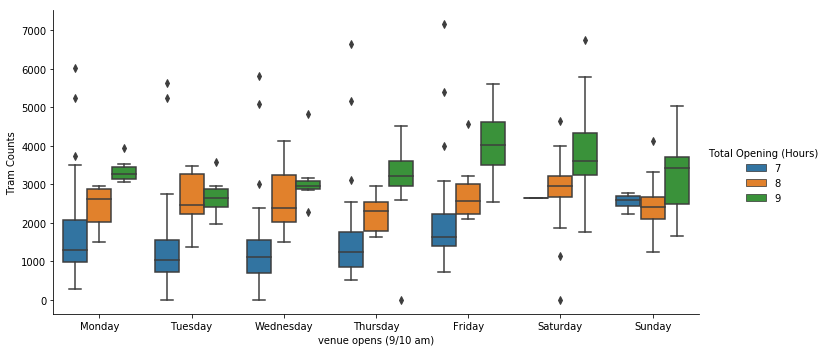

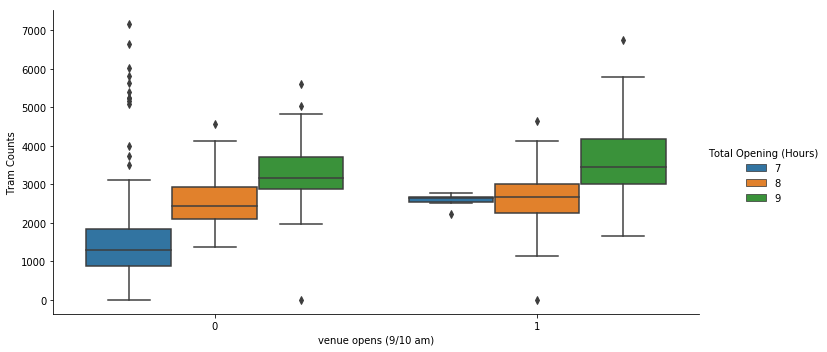

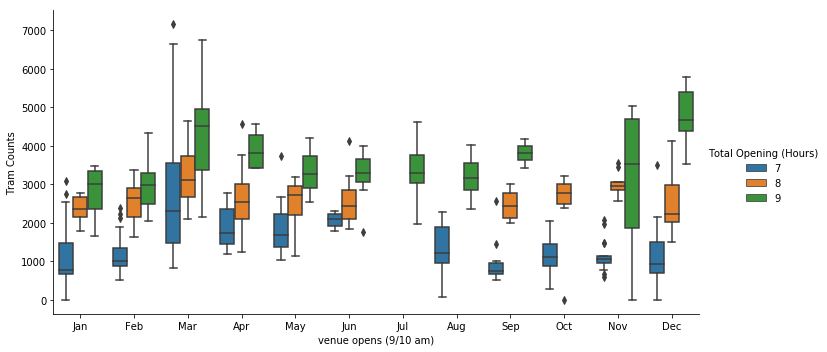

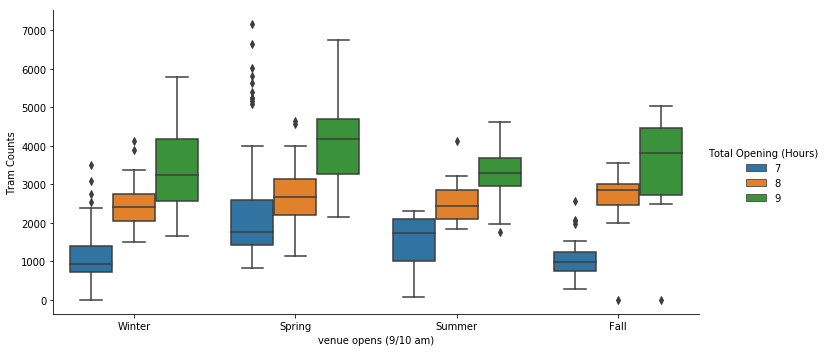

In [45]:
sns.boxplot(data=total_visitors, x='Total Opening (Hours)', y='Tram Counts').set(xlabel='venue opens (9/10 am)', ylabel='Tram Counts')
sns.factorplot("day", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue opens (9/10 am)', ylabel='Tram Counts')
sns.factorplot("weekend", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue opens (9/10 am)', ylabel='Tram Counts')
sns.factorplot("month", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue opens (9/10 am)', ylabel='Tram Counts')
sns.factorplot("season", "Tram Counts", "Total Opening (Hours)", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue opens (9/10 am)', ylabel='Tram Counts')

# Tram Counts by the Venue Closing Time

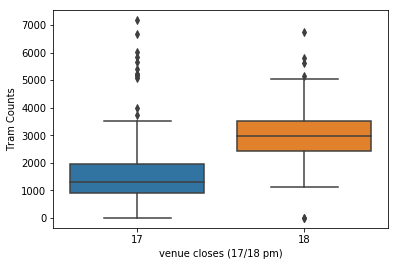

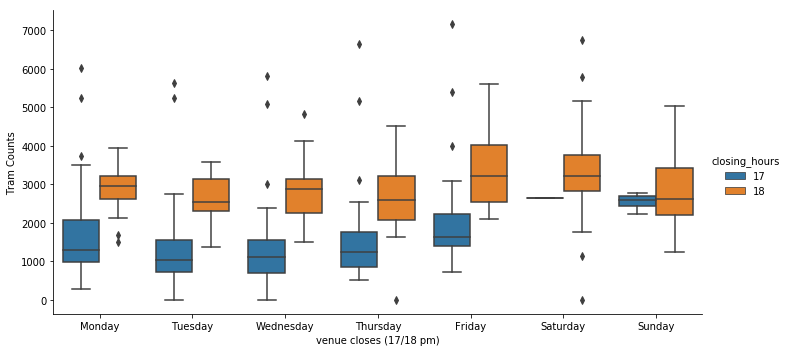

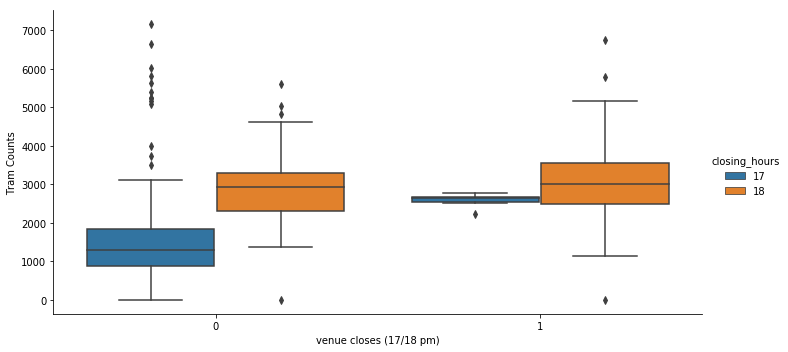

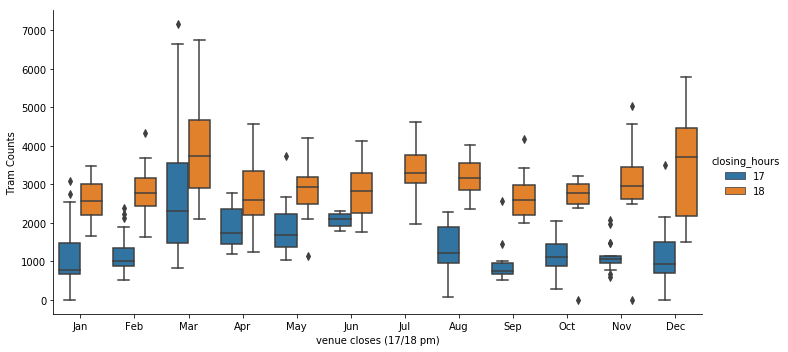

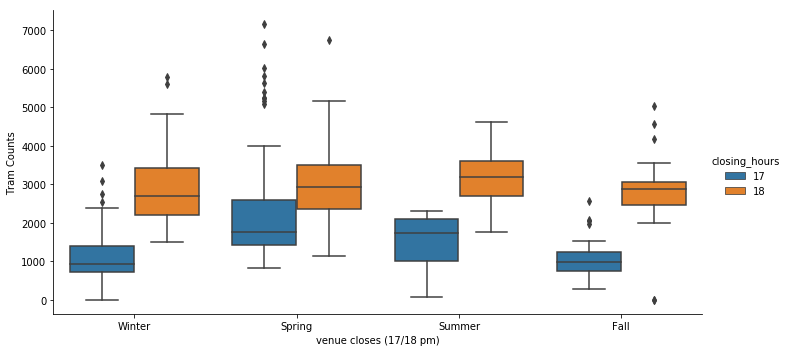

In [46]:
sns.boxplot(data=total_visitors, x='closing_hours', y='Tram Counts').set(xlabel='venue closes (17/18 pm)', ylabel='Tram Counts')
sns.factorplot("day", "Tram Counts", "closing_hours", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue closes (17/18 pm)', ylabel='Tram Counts')
sns.factorplot("weekend", "Tram Counts", "closing_hours", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue closes (17/18 pm)', ylabel='Tram Counts')
sns.factorplot("month", "Tram Counts", "closing_hours", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue closes (17/18 pm)', ylabel='Tram Counts')
sns.factorplot("season", "Tram Counts", "closing_hours", data=total_visitors, kind="box", size=5, aspect=2).set(xlabel='venue closes (17/18 pm)', ylabel='Tram Counts')

# Admission Ticket Data

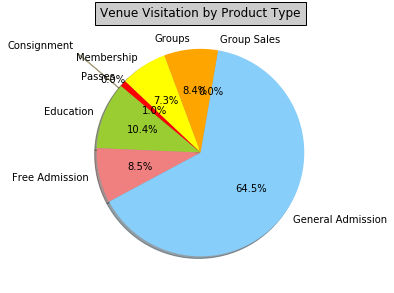

In [47]:
sizes = [pd.DataFrame(total_visitors.iloc[:,20:21].sum()).iloc[0,0], 
        pd.DataFrame(total_visitors.iloc[:,21:22].sum()).iloc[0,0], 
        pd.DataFrame(total_visitors.iloc[:,22:23].sum()).iloc[0,0], 
        pd.DataFrame(total_visitors.iloc[:,23:24].sum()).iloc[0,0], 
        pd.DataFrame(total_visitors.iloc[:,24:25].sum()).iloc[0,0], 
        pd.DataFrame(total_visitors.iloc[:,25:26].sum()).iloc[0,0], 
        pd.DataFrame(total_visitors.iloc[:,26:27].sum()).iloc[0,0], 
        pd.DataFrame(total_visitors.iloc[:,27:28].sum()).iloc[0,0], 
        ]
labels = ['Consignment', 'Education', 'Free Admission', 'General Admission', 'Group Sales', 'Groups', 'Membership', 'Passes']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue', 'orange', 'yellow', 'red']
explode = (0.5, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.title("Venue Visitation by Product Type", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Tram Count vs Specific Ticket Type from Venue Visitations
(Only show the one that have a strong correlations towards the Tram Counts)
- Child Ticket Type
- Free Admission
- Membership
- Adult General Admit
- Groups Ticket

In [48]:
trace4 = go.Bar(x=total_visitors.index, y=total_visitors['Tram Counts'], name='Tram Counts', 
                marker=dict(color='rgb(200,200,200)', 
                line=dict(color='rgb(8,48,107)', 
                width=0.5),),opacity=0.5)
trace5 = go.Scatter(x = total_visitors.index, y = total_visitors['child'], mode = 'lines', 
                    marker=dict(line=dict(width=0.3)), name = 'Child Ticket Type')
trace6 = go.Scatter(x = total_visitors.index, y = total_visitors['Free Admission'], mode = 'lines', 
                    marker=dict(line=dict(width=0.3)), name = 'Free Admission')
trace7 = go.Scatter(x = total_visitors.index, y = total_visitors['Membership'], mode = 'lines', 
                    marker=dict(line=dict(width=0.3)), name = 'Membership')
trace8 = go.Scatter(x = total_visitors.index, y = total_visitors['ad_gen_admit'], mode = 'lines', 
                    marker=dict(line=dict(width=0.3)), name = 'Adult General Admit')
trace9 = go.Scatter(x = total_visitors.index, y = total_visitors['Groups'], mode = 'lines', 
                    marker=dict(line=dict(width=0.3)), name = 'Group Ticket')
data2 = [trace4, trace5, trace6, trace7, trace8, trace9]
layout = go.Layout(title='Tram Counts vs Specific Ticket Type')
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig)

# Correlation by Ticket Types

In [66]:
ticket_type = pd.read_excel('Correlation_Ticket_Type.xlsx')
ticket_type = ticket_type.set_index('Visitation')
ticket_type

,Child,Free Admission,Adult General Admit,Groups,Membership
Visitation,,,,,
Tram Counts,0.889701,0.512520,0.921565,0.444928,0.894761
Venue Visitation,0.890095,0.638342,0.916137,0.538532,0.878840


In [67]:
trace0 = go.Scatter(x = ticket_type.index, y = ticket_type['Child'], 
                    mode = 'lines+markers', name = 'Child')
trace1 = go.Scatter(x = ticket_type.index, y = ticket_type['Free Admission'], 
                    mode = 'lines+markers', name = 'Free Admission')
trace2 = go.Scatter(x = ticket_type.index, y = ticket_type['Membership'], 
                    mode = 'lines+markers', name = 'Membership')
trace3 = go.Scatter(x = ticket_type.index, y = ticket_type['Adult General Admit'], 
                    mode = 'lines+markers', name = 'Adult General Admit')
trace4 = go.Scatter(x = ticket_type.index, y = ticket_type['Groups'], 
                    mode = 'lines+markers', name = 'Group Sales')
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(title='Correlation Value by Ticket Type for Tram Counts and Venue Visitation', 
                   yaxis=dict(title='Correlation Value', range=[0.4, 1]))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [68]:
total_visitors.shape

(498, 155)

In [69]:
total_visitors['non_child'] = total_visitors.iloc[:,1] - total_visitors.iloc[:,36]
labels = ['Child', 'Non-Child']
values = [pd.DataFrame(total_visitors.iloc[:,36:37].sum()).iloc[0,0],
          pd.DataFrame(total_visitors.iloc[:,135:136].sum()).iloc[0,0]]
colors = ['#FEBFB3', '#E1396C']
trace0 = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
data =[trace0]
layout = go.Layout(title='Child vs Non-Child Ticket Type')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#sizes = [pd.DataFrame(total_visitors.iloc[:,36:37].sum()).iloc[0,0],  
#        pd.DataFrame(total_visitors.iloc[:,141:142].sum()).iloc[0,0]]
#labels = ['Child Ticket Type', 'Non-Child Ticket Type']
#colors = ['lightcoral', 'lightskyblue']
#explode = (0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
#plt.tight_layout()
#plt.show()

In [54]:
total_visitors['non_ad_gen_admit'] = total_visitors.iloc[:,1] - total_visitors.iloc[:,41]
labels = ['Adult General Admit', 'Non-Adult General Admit']
values = [pd.DataFrame(total_visitors.iloc[:,41:42].sum()).iloc[0,0],
          pd.DataFrame(total_visitors.iloc[:,136:137].sum()).iloc[0,0]]
colors = ['#FEBFB3', '#E1396C']
trace0 = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
data =[trace0]
layout = go.Layout(title='Adult General Admit vs Non-Adult General Admit Ticket Type')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#sizes = [pd.DataFrame(total_visitors.iloc[:,41:42].sum()).iloc[0,0],  
#        pd.DataFrame(total_visitors.iloc[:,142:143].sum()).iloc[0,0]]
#labels = ['Adult General Admit', 'Non Adult General Admit']
#colors = ['lightcoral', 'lightskyblue']
#explode = (0, 0)  # explode 1st slice
#ax1.pie(sizes, explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
#plt.show()

# Weather Data

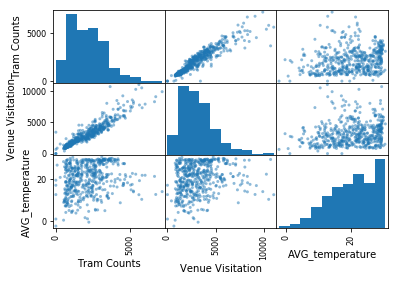

In [56]:
pd.scatter_matrix(total_visitors[['Tram Counts','Venue Visitation','AVG_temperature']])
plt.show()

In [70]:
weather_correlation = pd.read_excel('Correlation_Weather_V2.xlsx')
weather_correlation = weather_correlation.set_index('Visitation')
weather_correlation

,SUM_precipIntensity,AVG_temperature,AVG_humidity
Visitation,,,
Tram Counts,-0.112285,0.176591,-0.084442
Venue Visitation,-0.077493,0.164904,-0.067215


In [50]:
trace0 = go.Scatter(x = weather_correlation.index, y = weather_correlation['SUM_precipIntensity'], 
                    mode = 'lines+markers', name = 'Total Precipitation for that day (mm)')
trace1 = go.Scatter(x = weather_correlation.index, y = weather_correlation['AVG_temperature'], 
                    mode = 'lines+markers', name = 'Average Temperature for that day (Celcius)')
trace2 = go.Scatter(x = weather_correlation.index, y = weather_correlation['AVG_humidity'], 
                    mode = 'lines+markers', name = 'Humidity percentage for that day (%)')
data = [trace0, trace1, trace2]
layout = go.Layout(title='Correlation Value by Weather Variable for Tram Counts and Venue Visitation', 
                   yaxis=dict(title='Correlation Value', range=[-0.2, 0.2]))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

NameError: name 'weather_correlation' is not defined

In [60]:
trace2 = go.Bar(x=total_visitors.index, y=total_visitors['Tram Counts'], name='Tram Counts')
trace9 = go.Scatter(x = total_visitors.index, y = total_visitors['AVG_temperature'], name='Average Temperature (C)', yaxis='y2')
labels = ['Spring 2018', 'Summer 2018', 'Fall 2018', 'Winter 2018', 'Spring 2019']
tickvals = ['2018-03-01', '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01']
data1 = [trace2, trace9]
layout = go.Layout(title='Tram Counts vs Average Temperature', yaxis=dict(title='Number of Visitation', 
                                                                           range=[0, 8000]), 
                   yaxis2=dict(title='Average Temperature (C)', titlefont=dict(color='rgb(148, 103, 189)'), 
                               tickfont=dict(color='rgb(148, 103, 189)'), overlaying='y', side='right', 
                               range=[-10, 300]), 
                   xaxis=go.layout.XAxis(ticktext=labels, tickvals=tickvals))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

# Tram Counts vs Google Trends

In [82]:
trace2 = go.Bar(x=total_visitors.index, y=total_visitors['Tram Counts'], name='Tram Counts')
trace10 = go.Scatter(x = total_visitors.index, y = total_visitors['space_center_houston_ww'], name='Google Trend of "Space Center Houston"', yaxis='y2')

labels = ['2017','2018', '2019']
tickvals = ['2017-01-01','2018-01-01','2019-01-01']
data1 = [trace2, trace10]
layout = go.Layout(title='Tram Counts vs Google Trend Index of "Space Center Houston"', yaxis=dict(title='Number of Visitation', 
                                                                           range=[0, 8000]), 
                   yaxis2=dict(title='Google Trend', titlefont=dict(color='rgb(148, 103, 189)'), 
                               tickfont=dict(color='rgb(148, 103, 189)'), overlaying='y', side='right', 
                               range=[-10, 300]), 
                   xaxis=go.layout.XAxis(ticktext=labels, tickvals=tickvals))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

# Tram Counts by Weather State

In [65]:
trace0 = go.Box(y=total_visitors['Tram Counts'], 
                x=total_visitors['weather_state_2'], boxpoints = 'outliers', marker=dict(color='#FF4136', 
                outliercolor = 'rgba(219, 64, 82, 0.6)', line = dict(outliercolor = 'rgba(219, 64, 82, 0.6)', 
                outlierwidth = 2)), line = dict(color = 'rgb(8,81,156)'), boxmean=True)
data = [trace0]
layout = go.Layout(title = "Tram Counts by Weather State")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename = "Weather State")

In [54]:
trace2 = go.Bar(x=total_visitors.index, y=total_visitors['Tram Counts'], name='Venue Visitation')
trace3 = go.Scatter(x = total_visitors.index, y = total_visitors['AVG_temperature'], name='Average Temperature in a Day (C)', yaxis='y2')
labels2 = ['2017','2018', '2019']
tickvals2 = ['2017-01-01','2018-01-01','2019-01-01']
data1 = [trace2, trace3]
layout = go.Layout(title='Tram Counts vs Average Temperature', yaxis=dict(title='Number of Visitation', 
                                                                           range=[0, 8000]), 
                   yaxis2=dict(title='Average Temperature in a Day (C)', titlefont=dict(color='rgb(148, 103, 189)'), 
                               tickfont=dict(color='rgb(148, 103, 189)'), overlaying='y', side='right', 
                               range=[0, 200]), 
                   xaxis=go.layout.XAxis(ticktext=labels2, tickvals=tickvals2))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

# Visualize Actual vs Forecasted Values

In [5]:
prediction_testing_all = pd.read_excel('prediction_testing_all.xlsx')
prediction_testing_all.shape
prediction_testing_all.dtypes
prediction_testing_all = prediction_testing_all.set_index('Date')
prediction_testing_all.head()

,Tram_Counts,prediction_arima,prediction_regression,prediction_sarima,prediction_arimax,prediction_sarimax,prediction_quantileregression,prediction_rf,prediction_xgb,prediction_ensemble,error_arima,error_regression,error_sarima,error_arimax,error_sarimax,error_quantileregression,error_rf,error_xgb,error_ensemble
Date,,,,,,,,,,,,,,,,,,,
2019-01-01,2742,3190.708308,2812.925730,3023.907755,2805.276569,3083.849165,2682.859430,2712.824233,2952.694580,2880.315088,-448.708308,377.782578,-210.982025,218.631186,-278.572596,400.989735,-29.964803,-239.870347,72.379492
2019-01-02,2387,2941.459896,1783.114201,2772.120810,2072.177311,2779.024011,1880.703836,1827.255664,1986.433228,1994.608184,-554.459896,1158.345695,-989.006609,699.943499,-706.846700,898.320175,53.448172,-159.177564,-8.174956
2019-01-03,2547,2831.832019,1560.968717,2382.858202,1955.836664,2377.372837,1707.976220,1754.139977,1806.756836,1806.020569,-284.832019,1270.863302,-821.889485,427.021538,-421.536173,669.396617,-46.163757,-52.616859,0.736267
2019-01-04,3090,2999.260012,2276.838668,3080.620565,1998.496860,3069.956187,2377.455145,1915.729025,2097.352051,2227.138442,90.739988,722.421344,-803.781897,1082.123705,-1071.459327,692.501042,461.726120,-181.623026,-129.786391
2019-01-05,3456,3306.519217,3679.648959,3903.444001,2472.188502,3890.415393,3795.917602,3294.558659,3297.742920,3472.521005,149.480783,-373.129742,-223.795042,1431.255499,-1418.226891,94.497791,501.358943,-3.184261,-174.778085


In [6]:
trace0 = go.Bar(x=prediction_testing_all.index, y=prediction_testing_all['Tram_Counts'], name='Actual Visitation', 
                marker=dict(color='rgb(200,200,200)', 
                line=dict(color='rgb(8,48,107)', 
                width=0.5),),opacity=0.5)
#trace1 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['prediction_quantileregression'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Quantile Regression)')
#trace2 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['prediction_rf'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Random Forest)')
#trace3 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['prediction_xgb'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Xtreme Gradient Boosting)')
trace4 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['prediction_ensemble'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Ensemble Model)')

#data = [trace0, trace1, trace2, trace3, trace4]
data = [trace0, trace4]
layout = go.Layout(title='Actual vs Forecasted Tram Counts', xaxis=dict(title='Date'), yaxis=dict(title='Number of Visitation'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [9]:
#trace1 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_arima'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error ARIMA')
#trace2 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_sarima'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error SARIMA')
#trace3 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_arimax'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error ARIMAX')
#trace4 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_sarimax'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error SARIMAX')
#trace5 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_regression'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error Regression')
trace6 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_quantileregression'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error Quantile Regression')
#trace7 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_rf'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error Random Forest')
#trace8 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_xgb'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error XGBoost')
trace9 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['error_ensemble'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Error Ensemble')



#data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]
data = [trace6, trace9]

layout = go.Layout(title='Errors Plot for Quantile and Ensemble Model', xaxis=dict(title='Date'), yaxis=dict(title='Error Values'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Model Deployment 

In [15]:
prediction_deployment = pd.read_excel('prediction_deployment.xlsx')
prediction_deployment.shape
prediction_deployment.dtypes
prediction_deployment = prediction_deployment.set_index('Date')
prediction_deployment.head()

,Tram_Counts,day,month,public_holiday,school_holiday,regional_event,venue_closed,opening_hours,closing_hours,total_opening,AVG_temperature,SUM_precipIntensity,space_center_houston_ww,Tram_Counts_AVG_7,Tram_Counts_Lag_1,space_center_visitation_pred,prediction_quantileregression,prediction_sarimax,prediction_xgb,prediction_ensemble
Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,2742.0,2,1,1,1,0,0,10,17,7,12.790000,0.00,25,4091.285714,3539,3645.162841,2682.859430,3083.849165,2952.694580,2880.315088
2019-01-02,2387.0,3,1,0,0,0,0,10,17,7,11.949167,20.94,59,4483.000000,2742,1272.617386,1880.703836,2779.024011,1986.433228,1994.608184
2019-01-03,2547.0,4,1,0,0,0,0,10,17,7,10.110833,13.94,37,4133.142857,2387,1385.605476,1707.976220,2377.372837,1806.756836,1806.020569
2019-01-04,3090.0,5,1,0,0,0,0,10,17,7,9.103333,0.00,32,3851.571429,2547,2199.768387,2377.455145,3069.956187,2097.352051,2227.138442
2019-01-05,3456.0,6,1,0,0,0,0,9,18,9,12.317083,0.00,35,3492.428571,3090,3973.336645,3795.917602,3890.415393,3297.742920,3472.521005


In [16]:
trace0 = go.Bar(x=prediction_deployment.index, y=prediction_deployment['Tram_Counts'], name='Actual Visitation', 
                marker=dict(color='rgb(200,200,200)', 
                line=dict(color='rgb(8,48,107)', 
                width=0.5),),opacity=0.5)
#trace1 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['prediction_quantileregression'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Quantile Regression)')
#trace2 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['prediction_rf'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Random Forest)')
#trace3 = go.Scatter(x = prediction_testing_all.index, y = prediction_testing_all['prediction_xgb'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Xtreme Gradient Boosting)')
trace4 = go.Scatter(x = prediction_deployment.index, y = prediction_deployment['prediction_ensemble'], mode = 'lines', marker=dict(line=dict(width=0.3)), name = 'Forecasted Visitation (Ensemble Model)')

#data = [trace0, trace1, trace2, trace3, trace4]
data = [trace0, trace4]
layout = go.Layout(title='Actual vs Forecasted Tram Counts', xaxis=dict(title='Date'), yaxis=dict(title='Number of Visitation'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)